In [1]:
import pandas as pd
import numpy as np
from keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, Activation, Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import glob,os

train_path = 'dataset\\training\\'
train_files = [f for f in glob.glob(train_path + "*/*", recursive=True)]
test_path = 'dataset\\testing\\'
test_files = [f for f in glob.glob(test_path + "*/*",recursive= True)]

In [19]:
train_image_path = train_files
test_image_path = test_files
train_data=[]
train_labels=[]
test_data = []
test_labels = []

In [17]:
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

#### In training first 1000 and last 500 images are used currently

In [22]:
for img in train_image_path[-500:]:
    label = img.split(os.path.sep)[-2]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    train_data.append(image)
    train_labels.append(label)

In [23]:
train_array_data = np.array(train_data) / 255.0    
train_categ_labels = np.array(train_labels)   

#### In testing first 500 and last 200 images were tested.

In [25]:
for img in test_image_path[-200:]:
    label = img.split(os.path.sep)[-2]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    test_data.append(image)
    test_labels.append(label)

In [26]:
test_array_data = np.array(test_data) / 255.0
test_categ_labels = np.array(test_labels)  

In [27]:
lb = LabelBinarizer()
train_bin_labels = lb.fit_transform(train_categ_labels)
test_lbin_labels = lb.fit_transform(test_categ_labels)

In [28]:
c_model = Sequential()
c_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding='same'))
c_model.add(LeakyReLU(alpha=0.1))
c_model.add(MaxPooling2D((2, 2),padding='same'))
c_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
c_model.add(LeakyReLU(alpha=0.1))
c_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
c_model.add(Dropout(0.25))
c_model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
c_model.add(LeakyReLU(alpha=0.1))                  
c_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
c_model.add(Flatten())
c_model.add(Dense(128, activation='linear'))
c_model.add(LeakyReLU(alpha=0.1)) 
c_model.add(Dropout(0.5))
c_model.add(Dense(3, activation='softmax'))

In [29]:
c_model.compile(loss="categorical_crossentropy", optimizer="Adam",metrics=['accuracy'])


In [30]:
c_train = c_model.fit(train_array_data, train_bin_labels, batch_size=BS,epochs=EPOCHS,verbose=1,validation_data=(test_array_data, test_lbin_labels))


Train on 1500 samples, validate on 700 samples
Epoch 1/25
1500/1500 [==============================] - 463s 309ms/sample - loss: 0.6931 - accuracy: 0.7827 - val_loss: 0.8149 - val_accuracy: 0.7529
Epoch 2/25
1500/1500 [==============================] - 356s 237ms/sample - loss: 0.2410 - accuracy: 0.9167 - val_loss: 0.6930 - val_accuracy: 0.7643
Epoch 3/25
1500/1500 [==============================] - 256s 170ms/sample - loss: 0.1714 - accuracy: 0.9427 - val_loss: 0.8554 - val_accuracy: 0.7886
Epoch 4/25
1500/1500 [==============================] - 239s 159ms/sample - loss: 0.1350 - accuracy: 0.9553 - val_loss: 1.2227 - val_accuracy: 0.7371
Epoch 5/25
1500/1500 [==============================] - 248s 165ms/sample - loss: 0.1113 - accuracy: 0.9627 - val_loss: 1.1382 - val_accuracy: 0.7757
Epoch 6/25
1500/1500 [==============================] - 249s 166ms/sample - loss: 0.0904 - accuracy: 0.9740 - val_loss: 1.2085 - val_accuracy: 0.7786
Epoch 7/25
1500/1500 [==============================]

In [33]:
test_eval = c_model.evaluate(test_array_data, test_lbin_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.6011222754978656
Test accuracy: 0.7728571


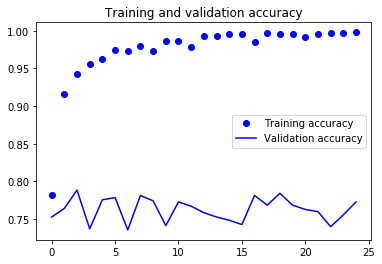

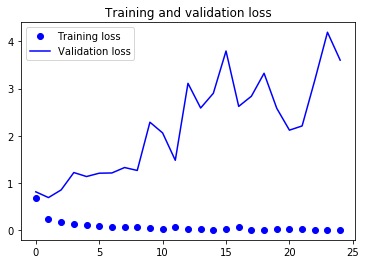

In [34]:
accuracy = c_train.history['accuracy']
val_accuracy = c_train.history['val_accuracy']
loss = c_train.history['loss']
val_loss = c_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes = c_model.predict(test_array_data)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [39]:
new_test_labels = []
for each in test_lbin_labels:
    if each[0]==0:
        if each[1]==0:
            if each[2]==1:
                new_test_labels.append(2)
            
        else:
            new_test_labels.append(1)
    else:
        new_test_labels.append(0)       

Found 541 correct labels


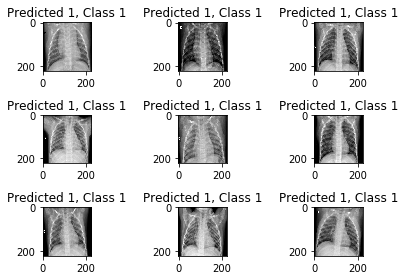

In [40]:
correct = np.where(predicted_classes==new_test_labels)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[50:59]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], new_test_labels[correct]))
    plt.tight_layout()

Found 159 incorrect labels


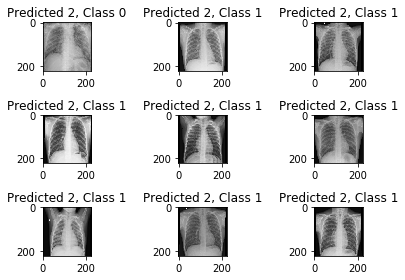

In [41]:
incorrect = np.where(predicted_classes!=new_test_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], new_test_labels[incorrect]))
    plt.tight_layout()

In [42]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(new_test_labels, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.30      0.95      0.46        19
     Class 1       0.80      0.39      0.53       165
     Class 2       0.82      0.89      0.85       516

   micro avg       0.77      0.77      0.77       700
   macro avg       0.64      0.74      0.61       700
weighted avg       0.80      0.77      0.77       700



In [44]:
cm = confusion_matrix(test_lbin_labels.argmax(axis=1), predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 18   0   1]
 [  0  65 100]
 [ 42  16 458]]
acc: 0.1186
sensitivity: 1.0000
specificity: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=2)
rf.fit(train_array_data, train_bin_labels)

y_pred_rf = rf.predict_proba(test_array_data)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)